In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [2]:
df = pd.read_csv("devices_dataset.csv")

In [3]:
df.head()

,DEVICES,STORAGE,MEMORY,CACHE MEMORY,POWER CONSUMPTION,PROCESSOR
0,acer predator,256,8,8,130,2.3
1,raspberry pi 4,128,4,2,15,1.5
2,Lenovo Ideapad 520,512,8,4,65,1.6
3,HP x360 Pavillion,128,8,8,65,1.8
4,dell inspiron desktop,256,4,6,145,2.8


In [4]:
X = df.values
laptop_full_info = df.values


In [5]:
X = X[ : , 1 :  ]
Y = np.arange(X.shape[0])

In [6]:
print(X)
print(Y)
print(Y.shape)

[[256 8 8 130 2.3]
 [128 4 2 15 1.5]
 [512 8 4 65 1.6]
 [128 8 8 65 1.8]
 [256 4 6 145 2.8]
 [256 8 4 145 2.7]
 [512 4 4 85 1.4]
 [256 6 4 35 1.4]
 [128 12 6 26 2.0]
 [512 8 6 65 1.0]]
[0 1 2 3 4 5 6 7 8 9]
(10,)


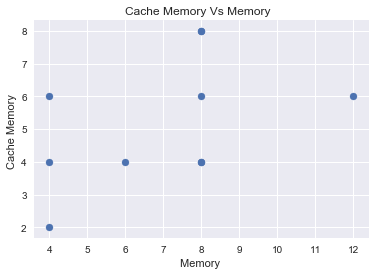

In [7]:
plt.scatter(X[: , 1] , X[: , 2])
plt.title("Cache Memory Vs Memory  ")
plt.xlabel("Memory ")
plt.ylabel("Cache Memory ")
plt.show()

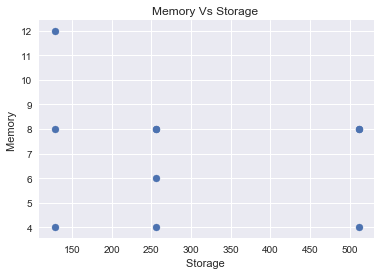

In [8]:
plt.scatter(X[: , 0] , X[: , 1])
plt.title("Memory Vs Storage ")
plt.xlabel("Storage ")
plt.ylabel("Memory ")
plt.show()

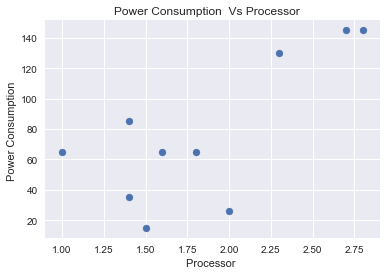

In [9]:
plt.scatter(X[: , 4] , X[: , 3])
plt.title("Power Consumption  Vs Processor   ")
plt.xlabel("Processor ")
plt.ylabel("Power Consumption ")
plt.show()

In [10]:
df.head()

,DEVICES,STORAGE,MEMORY,CACHE MEMORY,POWER CONSUMPTION,PROCESSOR
0,acer predator,256,8,8,130,2.3
1,raspberry pi 4,128,4,2,15,1.5
2,Lenovo Ideapad 520,512,8,4,65,1.6
3,HP x360 Pavillion,128,8,8,65,1.8
4,dell inspiron desktop,256,4,6,145,2.8


In [11]:
A1 = np.array([[1 ,3 ,7,5 ,5 ] , [1/3  , 1 , 5 ,4 ,3 ] ,[ 1/7  , 1/5  , 1 ,1/3  , 1/3 ] , [1/5 , 1/4 , 3 , 1 , 1/2 ] , [1/5  ,1/3 , 3 , 2 ,1]])

In [12]:
print(A1)

[[1.         3.         7.         5.         5.        ]
 [0.33333333 1.         5.         4.         3.        ]
 [0.14285714 0.2        1.         0.33333333 0.33333333]
 [0.2        0.25       3.         1.         0.5       ]
 [0.2        0.33333333 3.         2.         1.        ]]


In [13]:
def A2_matrix():    
    A2 = []
    for i in range(5):
        temp= 1.0 
        for j in range(5):
            temp*=A1[i][j]
        temp_pow = np.power(temp , 1/5)
        A2.append(temp_pow)
    A2 = np.array(A2)
    A2 = A2 / A2.sum()
    return A2


def A3_matrix():
    return np.dot(A1 , A2)

def A4_matrix():
    return A3 / A2 

###  A2 , A3 , A4  matrixes 

In [14]:
A2 = A2_matrix()
print(A2)

[0.49536008 0.25768856 0.04479474 0.08431433 0.11784228]


In [15]:
A3 = A3_matrix()
print(A3)

[2.59277203 1.33756647 0.23448372 0.44111385 0.60582337]


In [16]:
A4 = A4_matrix()
print(A4)

[5.2341158  5.19063186 5.23462598 5.2317779  5.14096776]


### Consistency Index (CI) 

In [17]:
CI = ((np.sum(A4) / 5) - 5 ) / 4

In [18]:
print(CI)

0.051605965214330585


### Consistency Ratio  (CR) 

In [19]:
CR = CI / 1.11

In [20]:
print(CR)

0.046491860553450975


In [21]:
print(X)

[[256 8 8 130 2.3]
 [128 4 2 15 1.5]
 [512 8 4 65 1.6]
 [128 8 8 65 1.8]
 [256 4 6 145 2.8]
 [256 8 4 145 2.7]
 [512 4 4 85 1.4]
 [256 6 4 35 1.4]
 [128 12 6 26 2.0]
 [512 8 6 65 1.0]]


In [22]:
X[: , 0 ] = X[: , 0] / X.max(axis=0)[0]  
X[: , 1 ] = X[: , 1] / X.max(axis=0)[1]  
X[: , 2 ] = X[: , 2] / X.max(axis=0)[2]  
X[: , 3 ] = X.min(axis=0)[3] /  X[: , 3]  
X[: , 4 ] = X[: , 4] / X.max(axis=0)[4]  

In [23]:
print(X)

[[0.5 0.6666666666666666 1.0 0.11538461538461539 0.8214285714285714]
 [0.25 0.3333333333333333 0.25 1.0 0.5357142857142857]
 [1.0 0.6666666666666666 0.5 0.23076923076923078 0.5714285714285715]
 [0.25 0.6666666666666666 1.0 0.23076923076923078 0.6428571428571429]
 [0.5 0.3333333333333333 0.75 0.10344827586206896 1.0]
 [0.5 0.6666666666666666 0.5 0.10344827586206896 0.9642857142857144]
 [1.0 0.3333333333333333 0.5 0.17647058823529413 0.5]
 [0.5 0.5 0.5 0.42857142857142855 0.5]
 [0.25 1.0 0.75 0.5769230769230769 0.7142857142857143]
 [1.0 0.6666666666666666 0.75 0.23076923076923078 0.35714285714285715]]


In [24]:
def predict_answer():
    predict_ans = []
    for i in range(X.shape[0]):
        yans = np.dot(X[i] , A2)
        predict_ans.append((yans , Y[i]))
        predict_ans = sorted(predict_ans , reverse= True)
        ans = np.array(predict_ans)
    return ans
def rank_of_laptop():
    lp_rank = []
    for i in range(X.shape[0]):
        lp = int(laptop_arrange[i][1])
        lp_rank.append(laptop_full_info[lp])
    lp_rank_numpy  =np.array(lp_rank)
    return lp_rank_numpy


In [25]:
laptop_arrange = predict_answer()

In [26]:
print(laptop_arrange)

[[0.77634543 2.        ]
 [0.7622922  9.        ]
 [0.67745378 6.        ]
 [0.57079475 0.        ]
 [0.56422559 5.        ]
 [0.54794058 8.        ]
 [0.49397755 7.        ]
 [0.49373674 4.        ]
 [0.43564004 3.        ]
 [0.36837902 1.        ]]


In [27]:
lp_rank = rank_of_laptop()

In [28]:
print(lp_rank)

[['Lenovo Ideapad 520' 512 8 4 65 1.6]
 ['Dell Inspiron 5593' 512 8 6 65 1.0]
 ['Acer Swift 3' 512 4 4 85 1.4]
 ['acer predator' 256 8 8 130 2.3]
 ['Lenovo Ideacentre desktop' 256 8 4 145 2.7]
 ['Samsung Galaxy S20 Ultra' 128 12 6 26 2.0]
 ['Samsung Galaxy Tab S6' 256 6 4 35 1.4]
 ['dell inspiron desktop' 256 4 6 145 2.8]
 ['HP x360 Pavillion' 128 8 8 65 1.8]
 ['raspberry pi 4' 128 4 2 15 1.5]]


In [29]:
dflp = pd.DataFrame(data=lp_rank  , columns=list(df.columns))
dflp.to_csv("ahp_Rank.csv", index = True)
dflp.head()

,DEVICES,STORAGE,MEMORY,CACHE MEMORY,POWER CONSUMPTION,PROCESSOR
0,Lenovo Ideapad 520,512,8,4,65,1.6
1,Dell Inspiron 5593,512,8,6,65,1
2,Acer Swift 3,512,4,4,85,1.4
3,acer predator,256,8,8,130,2.3
4,Lenovo Ideacentre desktop,256,8,4,145,2.7
